In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

%matplotlib inline

In [12]:
df = pd.read_csv('objects/ES5min_04-24-2023.csv', parse_dates=True)
df['Date']=df['Date'] + " " + df['Time']
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace = True)
df.dropna(inplace=True)



In [13]:
df = df.between_time(start_time='9:30:00', end_time='10:30:00', include_start='true', include_end='false' )
df = df[['Date', 'Time', 'Open', 'Last', 'High', 'Low', 'Volume', '# of Trades',
       'Bid Volume', 'Ask Volume', 'Delta']]

In [14]:
df.head(15)

,Date,Time,Open,Last,High,Low,Volume,# of Trades,Bid Volume,Ask Volume,Delta
Date,,,,,,,,,,,
2021-11-10 09:30:00,2021-11-10 09:30:00,09:30:00.000000,4730.50,4731.75,4735.25,4728.00,39308,23561,19638,19670,32
2021-11-10 09:35:00,2021-11-10 09:35:00,09:35:00.000000,4732.00,4733.25,4737.75,4730.25,29658,18573,14394,15264,870
2021-11-10 09:40:00,2021-11-10 09:40:00,09:40:00.000000,4733.25,4735.25,4738.00,4732.75,23366,14433,11463,11903,440
2021-11-10 09:45:00,2021-11-10 09:45:00,09:45:00.000000,4735.25,4737.75,4740.50,4735.25,21488,13030,10720,10768,48
2021-11-10 09:50:00,2021-11-10 09:50:00,09:50:00.000000,4738.00,4743.00,4743.25,4735.50,19947,12200,9704,10243,539
2021-11-10 09:55:00,2021-11-10 09:55:00,09:55:00.000000,4743.00,4745.75,4747.00,4739.75,29775,15770,14549,15226,677
2021-11-10 10:00:00,2021-11-10 10:00:00,10:00:00.000000,4745.50,4746.25,4747.50,4742.00,22694,13347,11798,10896,-902
2021-11-10 10:05:00,2021-11-10 10:05:00,10:05:00.000000,4746.50,4745.50,4747.50,4744.50,13789,8605,7121,6668,-453
2021-11-10 10:10:00,2021-11-10 10:10:00,10:10:00.000000,4745.50,4745.25,4746.75,4744.00,11993,7436,6101,5892,-209


In [16]:
df30 = df.resample("30min")
df31 = df30.agg({
            "Open":  "first",
            "High":  "max",
            "Low":   "min",
            "Last": "last",
            "Volume": "sum",
            "Delta": "sum"
        })
locs = df31.index.indexer_at_time('9:30:00')
df32 = df31.iloc[locs]
df32.dropna(inplace=True)
df32['30min-range'] =abs(df32['High'] - df32['Low'])
df32['Average 30min-range'] = df32['30min-range'].rolling(20).mean()

In [19]:
dfh = df.resample("D")
dfh2 = dfh.agg({
            "Open":  "first",
            "High":  "max",
            "Low":   "min",
            "Last": "last",
            "Volume": "sum",
            "Delta": "sum"
        })

dfh2.dropna(inplace=True)
dfh2['1h-range']=abs(dfh2['High']-dfh2['Low'])
dfh2['average_1h-range'] = dfh2['1h-range'].rolling(20).mean()
dfh2

,Open,High,Low,Last,Volume,Delta,1h-range,average_1h-range
Date,,,,,,,,
2021-11-10,4730.50,4748.75,4728.00,4743.00,262063,97,20.75,NaN
2021-11-11,4726.75,4727.50,4713.75,4716.00,217700,-5734,13.75,NaN
2021-11-12,4726.00,4726.50,4715.75,4716.25,208875,-11373,10.75,NaN
2021-11-15,4761.25,4762.75,4750.00,4752.50,232010,-174,12.75,NaN
2021-11-16,4746.25,4765.50,4745.50,4758.75,242041,2127,20.00,NaN
...,...,...,...,...,...,...,...,...
2023-04-18,4193.50,4194.75,4166.00,4168.00,361769,-17571,28.75,20.0000
2023-04-19,4158.50,4168.00,4157.75,4166.25,273624,1208,10.25,19.3500
2023-04-20,4146.25,4161.50,4145.00,4159.50,297346,2598,16.50,19.2500


,h,30m
Date,,
2021-11-10,20.75,NaN
2021-11-11,13.75,NaN
2021-11-12,10.75,NaN
2021-11-15,12.75,NaN
2021-11-16,20.00,NaN
...,...,...
2023-04-18,28.75,NaN
2023-04-19,10.25,NaN
2023-04-20,16.50,NaN


<AxesSubplot:xlabel='Date'>

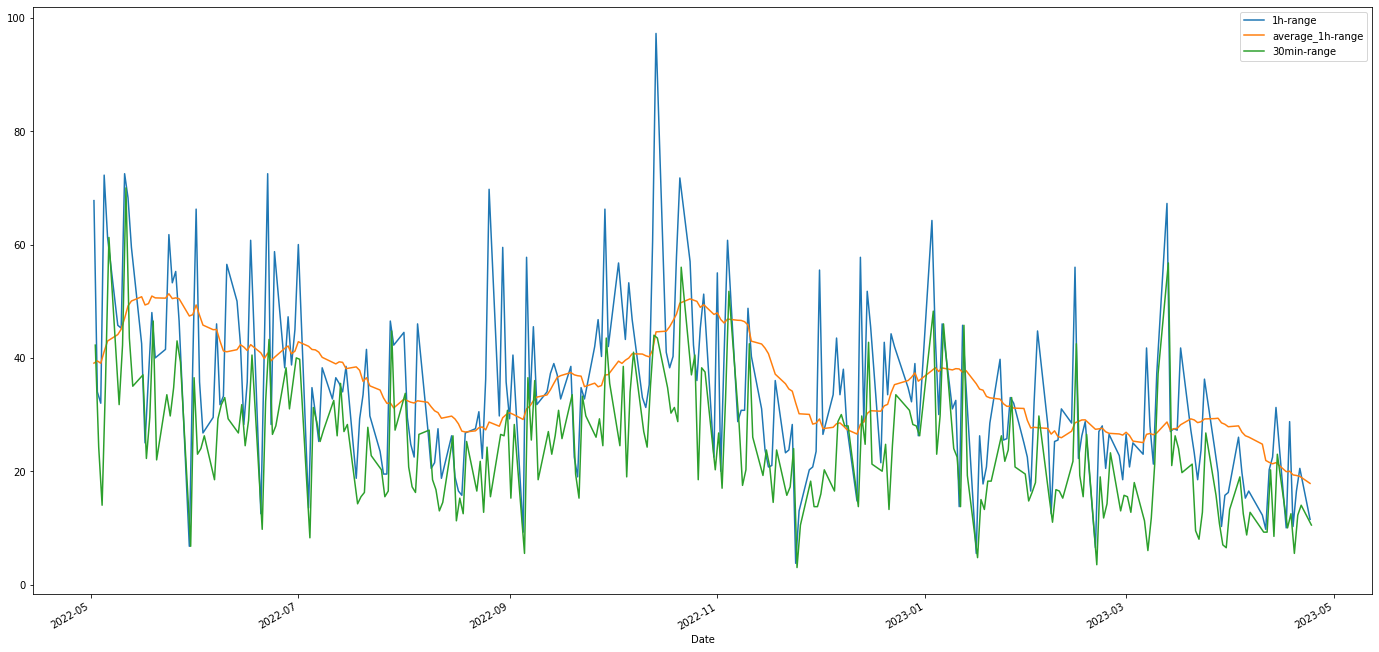

In [29]:
dfh2['1h-range']['2022-05-01':].plot(figsize=(24,12), legend = True)
dfh2['average_1h-range']['2022-05-01':].plot(legend=True)
df32['30min-range']['2022-05-01':].plot(legend=True)

#### Does delta in the first 5 min indicate price action in subseqent periods. What is delta in the first 5 min period. What is the high of following 30min period?

<AxesSubplot:xlabel='Date'>

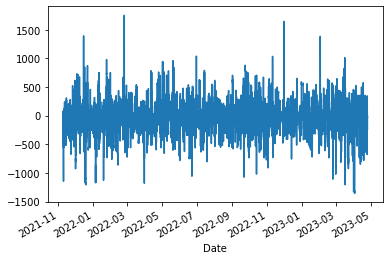

In [135]:
df['Delta_EMA-30'] = df['Delta'].rolling(30).mean()
df['Delta_EMA-30'].plot()

In [136]:
locs = df.index.indexer_at_time('9:30:00')
df = df.iloc[locs]
df.head(20)
df.dropna(inplace=True)
df['30min_high']=df32['High']
df['30min_low']=df32['Low']
df['sub_high_range'] = df['30min_high']-df['Last'] 
df['sub_low_range'] = df['30min_low']-df['Last']
df.columns

Index(['Date', 'Time', 'Open', 'Last', 'High', 'Low', 'Volume', '# of Trades',
       'Bid Volume', 'Ask Volume', 'Delta', 'GLOBEX VWAP', 'IB High Ext 1',
       'IB High', 'IB Mid', 'IB High Ext 3', 'IB High Ext 2', 'IB Low Ext 1',
       'IB Low Ext 2', 'US POC', 'US VWAP', 'ON POC', 'GLOBEX VWAP.1',
       'Delta_EMA-30', '30min_high', '30min_low', 'sub_high_range',
       'sub_low_range'],
      dtype='object')

In [137]:
d = df[['Delta', 'Delta_EMA-30', 'sub_high_range', 'sub_low_range',"Volume", '# of Trades']]
d['average_trades']=d['# of Trades'].rolling(30).mean()
d['average_volume']=d['Volume'].rolling(30).mean()